# Índice de Progresso Social - Amazônia Legal Brasileira

## 0. Imports

### 0.1. Libraries

In [1]:
# Data manipulation libraries
import pandas                as pd
import numpy                 as np

# Visualization libraries
import seaborn               as sns
import matplotlib            as mpl
import matplotlib.pyplot     as plt

# Geo libraries
import geopandas             as gpd

# Other
import warnings

### 0.2. Settings

In [2]:
# Ignoring warnings
warnings.filterwarnings('ignore')

# Pandas Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Visualization Settings
%matplotlib inline

# Set a style
mpl.style.use('ggplot')  

# Customize rcParams
mpl.rcParams.update({
    'axes.titlesize': 24,
    'axes.labelsize': 16,
    'axes.facecolor': 'white',
    'axes.linewidth': 1,
    'axes.grid': True,
    'xtick.labelsize': 16,
    'xtick.bottom': False,
    'ytick.labelsize': 16,
    'ytick.left': False,
    'legend.fontsize': 16,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'grid.color': 'lightgray',
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,
    'font.size': 16,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'figure.titlesize': 24,
    'figure.figsize': (16, 7),
    'figure.dpi': 150
})

### 0.3. Functions

In [3]:
def set_plot(fig, title, xlabel, ylabel):
    """
    Summary: This function sets the plot configuration for the initial plots. 
    Args:
        fig: the figure object.
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
    Returns: figure with the image configuration.
    """
    # Customizing
    fig.set_title(title)
    fig.set_xlabel(xlabel, color='black')
    fig.set_ylabel(ylabel, color='black')

    return fig

### 0.4. Classes

### 0.5. Datasets

In [4]:
# IPS 2014
df_ips14 = pd.read_csv('../data/data_zoom_R/ips_2014_alb.csv')

# IPS 2018
df_ips18 = pd.read_csv('../data/data_zoom_R/ips_2018_alb.csv')

# IPS 2021
df_ips21 = pd.read_csv('../data/data_zoom_R/ips_2021_alb.csv')

# IPS 2023
df_ips23 = pd.read_csv('../data/data_zoom_R/ips_2023_alb.csv')

In [5]:
# GeoDataFrame MU Brasil
gdf = gpd.read_file('../data/interim/amazonia_legal.geojson')

## 1. Data Preparation

In [6]:
df_ips14.head()

,codigo_ibge,municipio,areas_protegidas_percent_area_total_do_municipio,desmatamento_acumulado_percent_area_total_do_municipio,desmatamento_recente_percent_area_total_do_municipio,estado,ips_amazonia,ranking_ips,necessidades_humanas_basicas,fundamentos_para_o_bem_estar,oportunidades,nutricao_e_cuidados_medicos_basicos,agua_e_saneamento,moradia,moradias_com_iluminacao_adequada_percent_de_domicilios,moradias_com_parede_adequada_percent_de_domicilios,moradias_com_piso_adequado_percent_de_domicilios,seguranca_pessoal,acesso_ao_conhecimento_basico,acesso_a_informacao_e_comunicacao,saude_e_bem_estar,qualidade_do_meio_ambiente,direitos_individuais,liberdade_individual_e_de_escolha,tolerancia_e_inclusao,acesso_a_educacao_superior,mortalidade_infantil_ate_5_anos_obitos_1_000_nasc_vivos,mortalidade_materna_obitos_maternos_100_000_nascidos_vivos,mortalidade_por_desnutricao_obitos_100_000_habitantes,mortalidade_por_doencas_infecciosas_obitos_100_000_habitantes,subnutricao_percent_da_populacao,abastecimento_de_agua_adequado_percent_da_populacao,esgoto_adequado_percent_da_populacao,indice_atendimento_de_agua_percent_da_populacao,coleta_de_lixo_adequada_percent_de_domicilios,assassinatos_de_jovens_obitos_100_000_habitantes_de_15_a_29_anos,assassinatos_de_jovens_taxa_pontuada_em_uma_escala_de_1_6_1_0_2_1_6_3_6_10_4_10_20_5_20_40_6_40,homicidios_obitos_100_000_habitantes,homicidios_categorico_taxa_pontuada_em_uma_escala_de_1_6_1_0_2_1_6_3_6_10_4_10_20_5_20_40_6_40,mortes_por_acidente_no_transito_obitos_100_000_habitantes,abandono_escolar_ensino_fundamental_percent_de_alunos,distorcao_idade_serie_ensino_fundamental_percent_de_alunos,distorcao_idade_serie_ensino_medio_percent_de_alunos,qualidade_da_educacao_ideb_ensino_fundamental,reprovacao_escolar_ensino_fundamental_percent_de_alunos,densidade_internet_banda_larga_no_de_acessos_100_domicilios,densidade_telefonia_fixa_no_de_acessos_100_domicilios,densidade_telefonia_movel_no_de_acessos_100_habitantes,densidade_tv_por_assinatura_no_de_acessos_100_domicilios,mortalidade_por_diabetes_mellitus_obitos_100_000_habitantes,mortalidade_por_cancer_obitos_100_000_habitantes,mortalidade_por_doencas_circulatorias_obitos_100_000_habitantes,mortalidade_por_doencas_respiratorias_obitos_100_000_habitantes,mortalidade_por_suicidios_obitos_100_000_habitantes,emissoes_co2_ton_co2_habitante,focos_de_calor_na_de_focos_1_000_habitantes,diversidade_partidaria_percent_vereadores_eleitos_partidos_diferentes,transporte_publico_no_de_onibus_e_micro_onibus_1_000_habitantes,acesso_a_programas_de_direitos_humanos_categorico_0_15_0_nenhum_programa_15_todos_os_programas_de_direitos_humanos_implantados,existencia_de_acoes_para_direitos_de_minorias_categorico_0_15_0_nenhum_programa_11_todos_os_programas_de_direitos_humanos_implantados,acesso_a_cultura_esporte_e_lazer_categorica_1_10,gravidez_na_infancia_e_adolescencia_percent_de_filhos_de_maes_com_ate_19_anos,trabalho_infantil_no_de_familias_com_ao_menos_1_membro_em_trabalho_infantil_1_000_familias,vulnerabilidade_familiar_percent_de_filhos_de_maes_solteiras,violencia_contra_indigenas_no_de_casos_1_000_indigenas,violencia_contra_indigenas_taxa_pontuada_em_uma_escala_de_1_5_1_0_2_0_1_2_7_3_2_7_8_8_4_8_8_20_8_5_20_8,violencia_contra_mulheres_no_de_casos_100_000_mulheres,violencia_infantil_no_de_casos_100_000_pessoas_de_0_14_anos,violencia_infantil_taxa_pontuada_em_uma_escala_de_1_5_1_0_2_1_1_40_1_3_40_1_133_1_4_133_1_496_0_5_496_0,empregos_ensino_superior_percent_de_empregos_em_relacao_ao_total,mulheres_com_empregos_ensino_superior_percent_de_empregos_em_relacao_ao_total,ano
0,1100015,Alta Floresta D'Oeste,28.08,31.99,0.98,RO,55.40,197,60.20,57.37,48.64,95.15,26.73,74.76,81.79,95.42,69.57,44.15,67.28,12.25,79.04,70.91,20.70,69.31,97.11,7.44,5.87,0.00,4.24,8.63,4.84,17.06,23.95,38.91,48.71,30.28,5,31.28,5,24.14,3.50,24.30,26.40,4.65,10.50,5.98,13.89,43.01,2.60,8.63,77.70,155.39,51.80,4.32,52.87,3.34,100.00,3.12,12,0,3,20.23,110.13,18.77,0.00,1,25.77,0.00,1,11.27,6.71,2014
1,1100023

### 1.1. Filtering

In [7]:
# Selecting columns
cols = ['codigo_ibge', 'municipio', 'estado', 'ips_amazonia', 'ranking_ips', 
        'necessidades_humanas_basicas', 'fundamentos_para_o_bem_estar', 'oportunidades']

# Filtering
dff_ips14 = df_ips14[cols]
dff_ips18 = df_ips18[cols]
dff_ips21 = df_ips21[cols]
dff_ips23 = df_ips23[cols]

### 1.2. GeoDataFrames

In [8]:
gdff_ips23 = pd.merge(dff_ips23, gdf[['cod_ibge', 'geometry']], left_on='codigo_ibge', right_on='cod_ibge', how='left')

gdff_ips23 = gpd.GeoDataFrame(gdff_ips23)

## 2. Data Exploration

<Axes: >

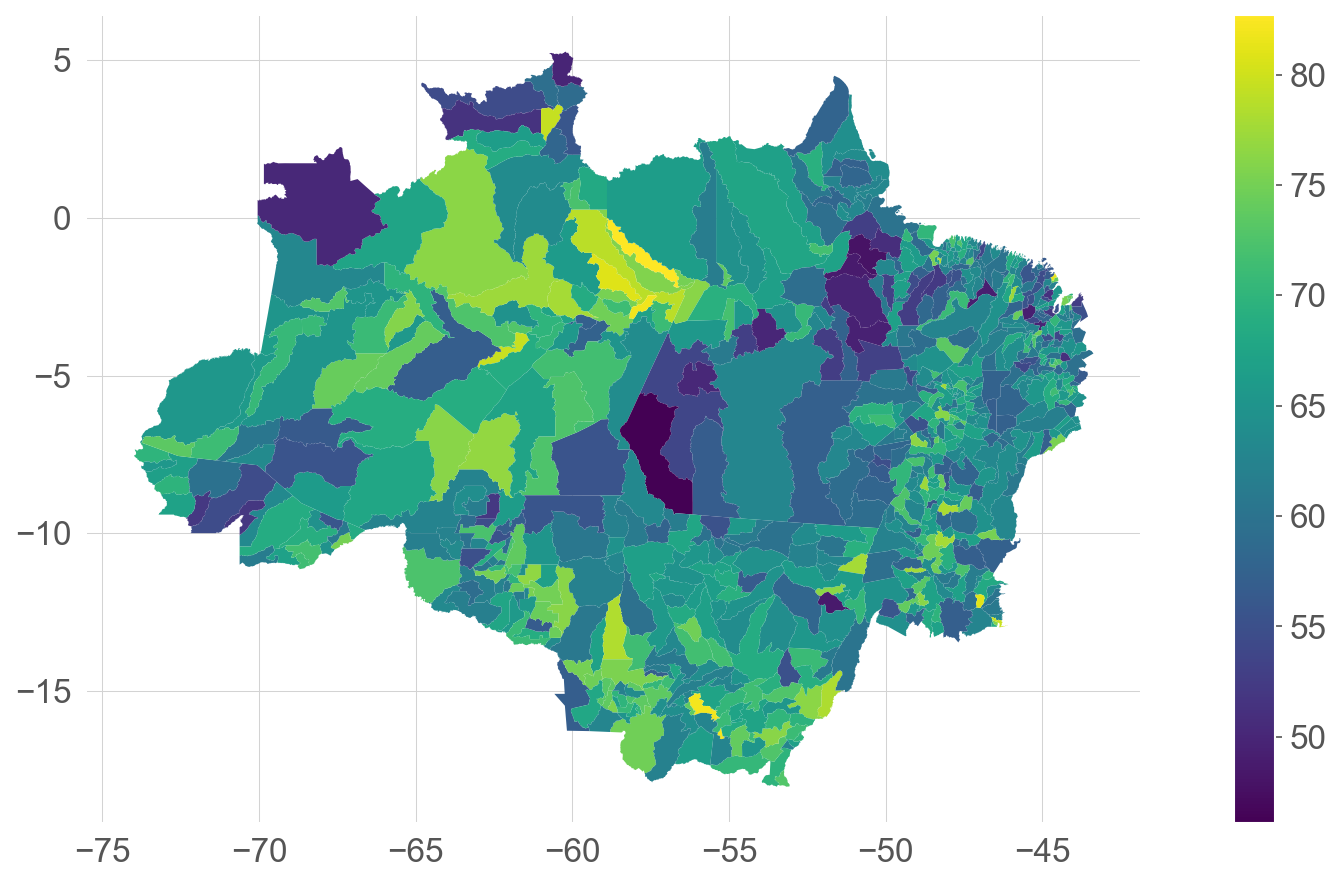

In [9]:
gdff_ips23.plot(column='necessidades_humanas_basicas', cmap='viridis', legend=True)

<Axes: >

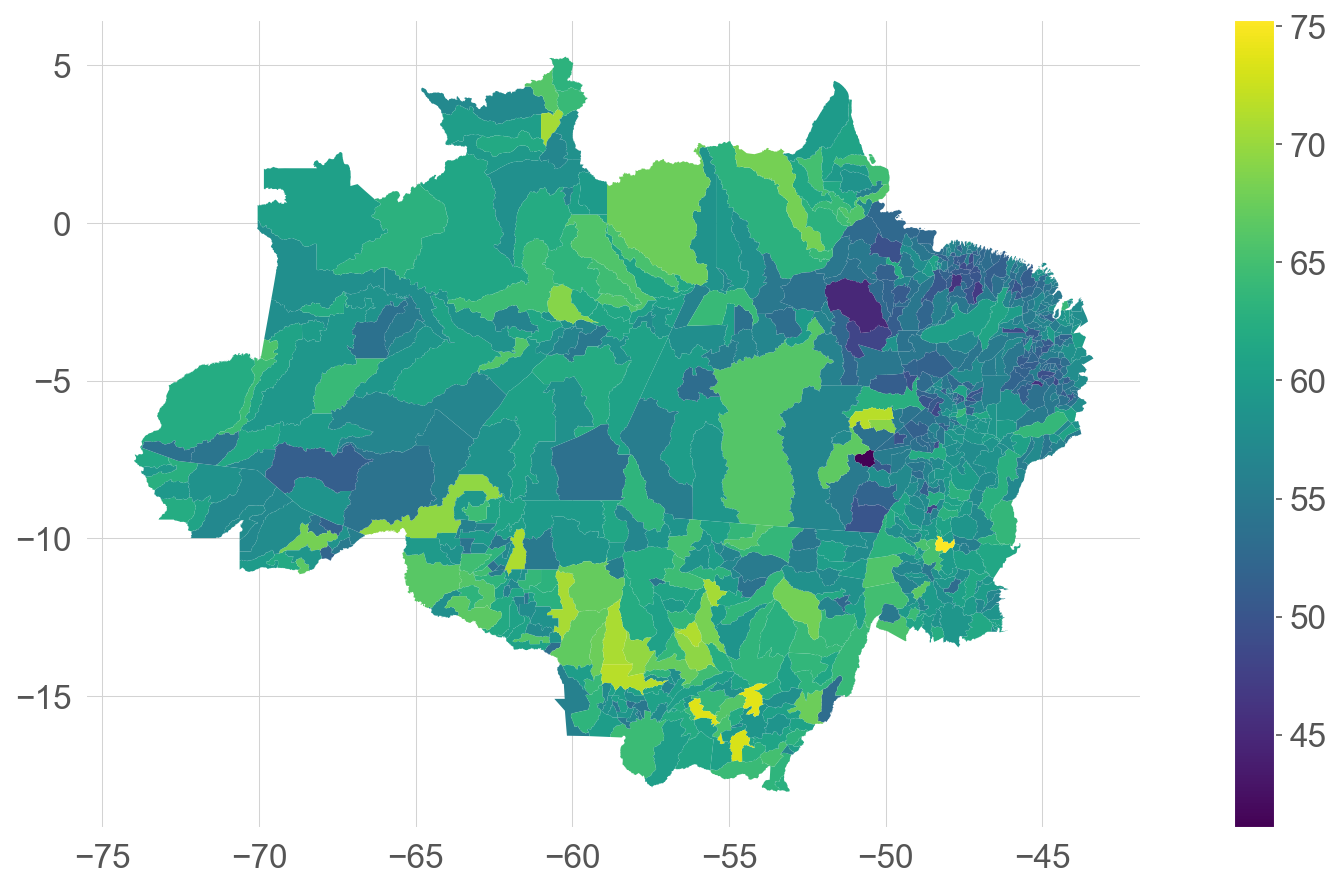

In [10]:
gdff_ips23.plot(column='fundamentos_para_o_bem_estar', cmap='viridis', legend=True)